In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


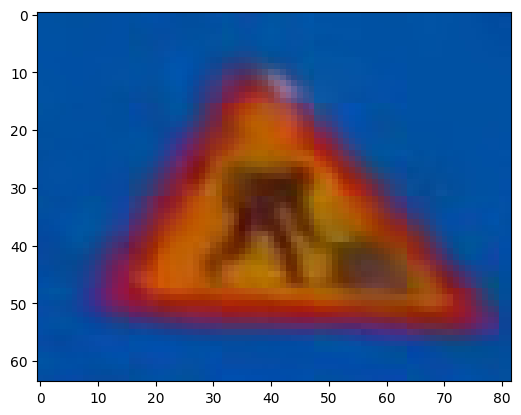

In [ ]:
img = image.load_img("/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Date/fsl_data(2)/train/construction danger/0.jpg")
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data(2)/train/construction danger/0.jpg")

array([[[162,  81,   0],
        [162,  81,   0],
        [162,  81,   0],
        ...,
        [159,  75,   0],
        [157,  72,   0],
        [157,  72,   0]],

       [[162,  81,   0],
        [162,  81,   0],
        [162,  81,   0],
        ...,
        [159,  75,   0],
        [161,  76,   2],
        [161,  76,   2]],

       [[163,  81,   0],
        [163,  81,   0],
        [162,  81,   0],
        ...,
        [159,  75,   0],
        [162,  78,   2],
        [162,  78,   2]],

       ...,

       [[162,  82,   0],
        [162,  82,   0],
        [164,  80,   0],
        ...,
        [154,  77,   4],
        [156,  78,   2],
        [156,  78,   1]],

       [[161,  79,   2],
        [161,  79,   2],
        [164,  78,   2],
        ...,
        [156,  78,   2],
        [157,  79,   3],
        [157,  79,   3]],

       [[161,  78,   3],
        [160,  77,   2],
        [163,  76,   2],
        ...,
        [158,  77,   2],
        [157,  79,   3],
        [157,  79,   3]]

In [ ]:
train = ImageDataGenerator(rescale=1./255,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')
val = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = "/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data(2)/train"
val_dir = "/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data(2)/test"

In [ ]:
train_dataset = train.flow_from_directory(
    train_dir,
    target_size= (32,32),
    batch_size = 2,
    class_mode = "categorical"
)

val_dataset = train.flow_from_directory(
    val_dir,
    target_size= (32,32),
    batch_size = 2,
    class_mode = "categorical"
)

Found 242 images belonging to 24 classes.
Found 26 images belonging to 24 classes.


In [ ]:
# Define the input shape
input_shape = (32, 32, 3)

# Build the model
model = Sequential()

# Block 1
model.add(Conv2D(6, (5, 5), activation='relu', padding='same', input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(16, (5, 5), activation='relu', padding='valid'))
model.add(AveragePooling2D((2, 2), strides=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Dense layers
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(24, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)               6

In [ ]:
model.fit(train_dataset,epochs=50,validation_data=val_dataset)

Epoch 1/50
121/121 [==============================] - 70s 562ms/step - loss: 3.1878 - accuracy: 0.0207 - val_loss: 3.1583 - val_accuracy: 0.0385
Epoch 2/50
121/121 [==============================] - 2s 14ms/step - loss: 3.1041 - accuracy: 0.0413 - val_loss: 2.9405 - val_accuracy: 0.1538
Epoch 3/50
121/121 [==============================] - 2s 15ms/step - loss: 2.9033 - accuracy: 0.0702 - val_loss: 2.7205 - val_accuracy: 0.1154
Epoch 4/50
121/121 [==============================] - 3s 21ms/step - loss: 2.6990 - accuracy: 0.0950 - val_loss: 2.6684 - val_accuracy: 0.1538
Epoch 5/50
121/121 [==============================] - 2s 13ms/step - loss: 2.5811 - accuracy: 0.0868 - val_loss: 2.3987 - val_accuracy: 0.1538
Epoch 6/50
121/121 [==============================] - 2s 14ms/step - loss: 2.4483 - accuracy: 0.1446 - val_loss: 2.2408 - val_accuracy: 0.2308
Epoch 7/50
121/121 [==============================] - 2s 13ms/step - loss: 2.3482 - accuracy: 0.1281 - val_loss: 2.1791 - val_accuracy: 0.19

In [ ]:
train_dataset.class_indices

{'construction danger': 0,
 'direction': 1,
 'height limit': 2,
 'indication': 3,
 'intersection danger': 4,
 'no car entryturning': 5,
 'no more prohibition': 6,
 'no motorbike entryturning': 7,
 'no parking': 8,
 'no stopping and parking': 9,
 'no truck entryturning': 10,
 'no turn left': 11,
 'no turn right': 12,
 'no u and left turn': 13,
 'no u turn': 14,
 'one way prohibition': 15,
 'pedestrian crossing': 16,
 'pedestrian danger': 17,
 'road danger': 18,
 'slow warning': 19,
 'speed limit': 20,
 'vehicle and speed permission lane': 21,
 'vehicle permission lane': 22,
 'weight limit': 23}

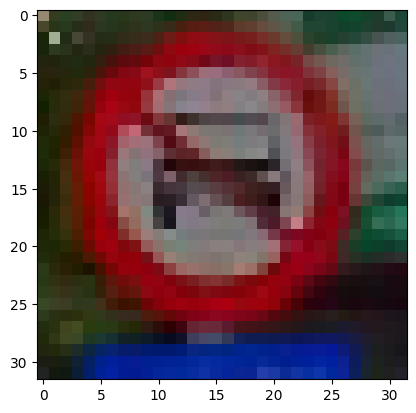

1/1 [==============================] - 0s 141ms/step
no car entry/turning


In [ ]:
# Define a list of class names
class_names = ['construction danger',
 'direction',
 'height limit',
 'indication',
 'intersection danger',
 'no car entry/turning',
 'no more prohibition',
 'no motorbike entry/turning',
 'no parking',
 'no stopping and parking',
 'no truck entry/turning',
 'no turn left',
 'no turn right',
 'no u and left turn',
 'no u turn',
 'one way prohibition',
 'pedestrian crossing',
 'pedestrian danger',
 'road danger',
 'slow warning',
 'speed limit',
 'vehicle and speed permission lane',
 'vehicle permission lane',
 'weight limit']

# Define the model's prediction
tst_img_dir = "/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data/train_resized/56.jpg"
test_image = image.load_img(tst_img_dir, target_size=(32, 32))
plt.imshow(test_image)
plt.show()
X = image.img_to_array(test_image)
X = np.expand_dims(X, axis=0)
test_img = np.vstack([X])
value = model.predict(test_img)

# Get the index of the predicted class
predicted_class_idx = np.argmax(value, axis=1)[0]

# Get the predicted class name
predicted_class_name = class_names[predicted_class_idx]

# Print the predicted class name
print(predicted_class_name)

In [ ]:
model.save('/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Code/saved_model/lenet_5_model')
#new_model = tf.keras.models.load_model('/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Code/saved_model/mobilenet_model')